# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
type(lat_range)

tuple

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'
query_url=f'{url}appid={weather_api_key}&units={units}&q='
# list for city name
cityname=[]
# list for cloudines
cloud=[]
# list for country
ctry=[] 
# list for date
date=[] 
# list for humidity
humi=[] 
# list for latitude
lat=[]
# list for longitude
lng=[]
# list for max temperature
maxtemp=[]
# list for wind speed
wind=[]     
count=1 

print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                               
            cityname.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humi.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            
            print(city + ' city not found. Skipping...')   
        count=count+1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 605 | bredasdorp
Processing Record 2 of 605 | ostrovnoy
Processing Record 3 of 605 | hermanus
Processing Record 4 of 605 | komsomolskiy
Processing Record 5 of 605 | rikitea
Processing Record 6 of 605 | provideniya
Processing Record 7 of 605 | namatanai
Processing Record 8 of 605 | sucua
Processing Record 9 of 605 | taolanaro
taolanaro city not found. Skipping...
Processing Record 10 of 605 | husavik
Processing Record 11 of 605 | hala
Processing Record 12 of 605 | invermere
Processing Record 13 of 605 | kudahuvadhoo
Processing Record 14 of 605 | cape town
Processing Record 15 of 605 | bauchi
Processing Record 16 of 605 | hithadhoo
Processing Record 17 of 605 | mahebourg
Processing Record 18 of 605 | albany
Processing Record 19 of 605 | ponta do sol
Processing Record 20 of 605 | inhuma
Processing Record 21 of 605 | attawapiskat
attawapiskat city not found. Skipping...
Processing Record 22 of 605 | borama
borama

Processing Record 194 of 605 | klaksvik
Processing Record 195 of 605 | okhotsk
Processing Record 196 of 605 | tuggurt
tuggurt city not found. Skipping...
Processing Record 197 of 605 | camacha
Processing Record 198 of 605 | talnakh
Processing Record 199 of 605 | hay river
Processing Record 200 of 605 | kavieng
Processing Record 201 of 605 | brae
Processing Record 202 of 605 | pindiga
Processing Record 203 of 605 | bar harbor
Processing Record 204 of 605 | east london
Processing Record 205 of 605 | norman wells
Processing Record 206 of 605 | hofn
Processing Record 207 of 605 | novyy urengoy
Processing Record 208 of 605 | sitio novo do tocantins
Processing Record 209 of 605 | paamiut
Processing Record 210 of 605 | bambous virieux
Processing Record 211 of 605 | troyes
Processing Record 212 of 605 | jipijapa
Processing Record 213 of 605 | pilar
Processing Record 214 of 605 | port hedland
Processing Record 215 of 605 | mountain home
Processing Record 216 of 605 | georgetown
Processing Recor

Processing Record 382 of 605 | chegdomyn
Processing Record 383 of 605 | huazolotitlan
huazolotitlan city not found. Skipping...
Processing Record 384 of 605 | constitucion
Processing Record 385 of 605 | kenai
Processing Record 386 of 605 | sorland
Processing Record 387 of 605 | shubarshi
Processing Record 388 of 605 | lagoa
Processing Record 389 of 605 | bairiki
Processing Record 390 of 605 | rio grande
Processing Record 391 of 605 | ciucurova
Processing Record 392 of 605 | pouembout
Processing Record 393 of 605 | rocha
Processing Record 394 of 605 | maiduguri
Processing Record 395 of 605 | shipitsyno
Processing Record 396 of 605 | magistralnyy
Processing Record 397 of 605 | tual
Processing Record 398 of 605 | saint-louis
Processing Record 399 of 605 | vardo
Processing Record 400 of 605 | kamenka
Processing Record 401 of 605 | santarem
Processing Record 402 of 605 | bandar-e anzali
Processing Record 403 of 605 | astoria
Processing Record 404 of 605 | dingle
Processing Record 405 of 605

Processing Record 574 of 605 | katuli
Processing Record 575 of 605 | adjumani
Processing Record 576 of 605 | voyvozh
Processing Record 577 of 605 | barawe
barawe city not found. Skipping...
Processing Record 578 of 605 | suntar
Processing Record 579 of 605 | meulaboh
Processing Record 580 of 605 | kota belud
Processing Record 581 of 605 | kalianget
Processing Record 582 of 605 | san patricio
Processing Record 583 of 605 | maniitsoq
Processing Record 584 of 605 | naftah
naftah city not found. Skipping...
Processing Record 585 of 605 | dawson creek
Processing Record 586 of 605 | palabuhanratu
palabuhanratu city not found. Skipping...
Processing Record 587 of 605 | hirara
Processing Record 588 of 605 | roros
Processing Record 589 of 605 | anadyr
Processing Record 590 of 605 | tsienyane
tsienyane city not found. Skipping...
Processing Record 591 of 605 | berlevag
Processing Record 592 of 605 | stavern
Processing Record 593 of 605 | nangong
Processing Record 594 of 605 | caceres
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_dict = {'City': cityname,'Country': ctry,'Date': date,'Lat': lat,'Lng': lng,'Cloudiness (%)': cloud,'Humidity (%)': humi,'Max Temp (F)': maxtemp,'Wind Speed (mph)': wind}

weather_data=pd.DataFrame(weather_dict)
weather_data.head()

weather_data.dropna() 
weather_data.count()

City                559
Country             559
Date                559
Lat                 559
Lng                 559
Cloudiness (%)      559
Humidity (%)        559
Max Temp (F)        559
Wind Speed (mph)    559
dtype: int64

In [26]:
weather_data.to_csv("cityoutput_data", index=False)
weather_data.head()


,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Bredasdorp,ZA,1627944356,-34.5322,20.0403,19,93,56.28,4.61
1,Ostrovnoy,RU,1627944413,68.0531,39.5131,77,97,51.10,5.14
2,Hermanus,ZA,1627944413,-34.4187,19.2345,2,87,57.90,9.08
3,Yangi Marg`ilon,UZ,1627944414,40.4272,71.7189,98,60,72.82,6.91
4,Rikitea,PF,1627944272,-23.1203,-134.9692,79,54,69.08,20.42


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
weather_data.sort_values(by='Humidity (%)', ascending=False).head()

,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
28,Mount Gambier,AU,1627944421,-37.8333,140.7667,40,100,42.71,8.05
236,Leningradskiy,RU,1627944487,69.3833,178.4167,100,100,33.17,10.02
480,Puyo,EC,1627944561,-1.4667,-77.9833,75,100,63.64,8.05
399,Alyangula,AU,1627944537,-13.8483,136.4192,75,100,69.67,0.00
304,El Cobre,CU,1627944506,20.0489,-75.9469,40,100,78.24,6.91


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<ipython-input-30-54a61dd5de37>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


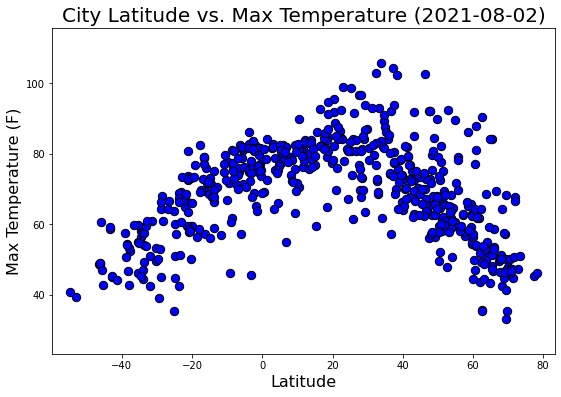

In [30]:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Max Temp (F)'], marker='o', edgecolors='black', color='blue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Max Temp (F)'])-10, max(weather_data['Max Temp (F)'])+10)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure:
plt.savefig("City Latitude vs. MaxTemp.png")

# Show plot:
plt.show()

## Latitude vs. Humidity Plot

<ipython-input-31-a6688c5653d7>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


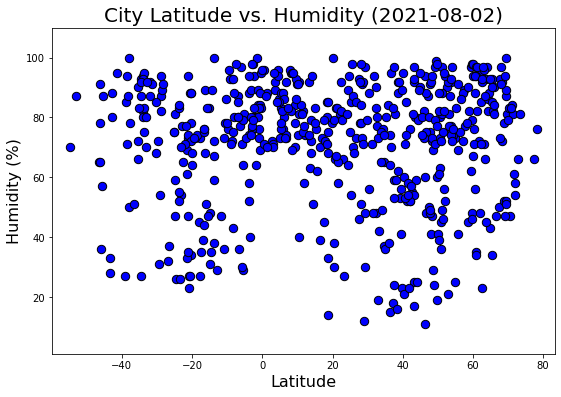

In [31]:
# Build a scatter plot for all cities vs humidity level:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Humidity (%)'], marker='o', edgecolors='black', color='blue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Humidity (%)'])-10, max(weather_data['Humidity (%)'])+10)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure:
plt.savefig("City Latitude vs. Humidity.png")

# Show plot:
plt.show()


## Latitude vs. Cloudiness Plot

<ipython-input-32-7036d330a5b3>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


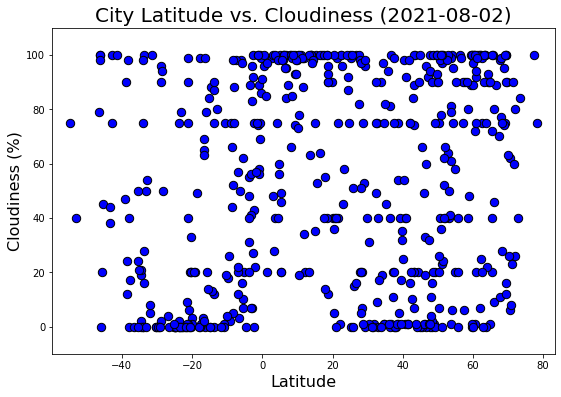

In [32]:
# Build a scatter plot for all cities vs cloudiness level:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Cloudiness (%)'], marker='o', edgecolors='black', color='blue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Cloudiness (%)'])-10, max(weather_data['Cloudiness (%)'])+10)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure
plt.savefig("City Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

<ipython-input-33-82f704f872f9>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


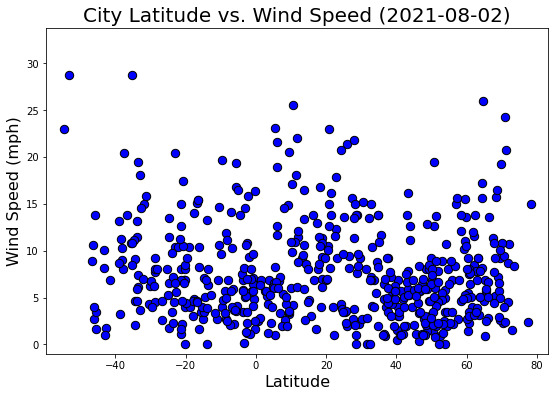

In [33]:
# Build a scatter plot for all cities vs wind speed:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Wind Speed (mph)'], marker='o', edgecolors='black', color='blue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Wind Speed (mph)'])-1, max(weather_data['Wind Speed (mph)'])+5)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure
plt.savefig("City Latitude vs. Wind.png")

# Show plot
plt.show()

## Linear Regression

In [37]:
weather_data_north = weather_data[weather_data['Lat'] >= 0]

weather_data_north.count()

# Create new data frame for southern hemisphere (lat < 0 degree):

weather_data_south = weather_data[weather_data['Lat'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.41


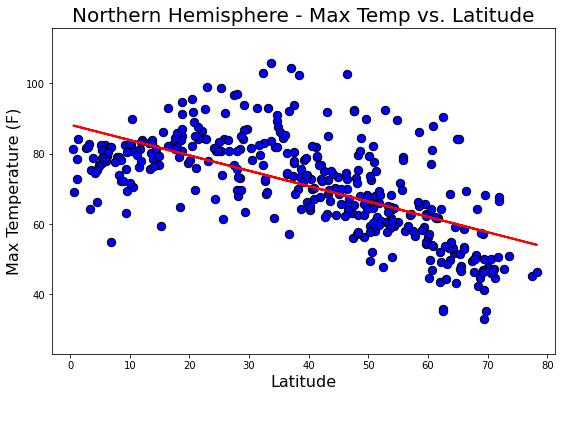

In [39]:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Max Temp (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
plt.grid(False)
# Set the limits of the y axis:
plt.ylim(min(weather_data['Max Temp (F)'])-10, max(weather_data['Max Temp (F)'])+10)

# Set the limits of the x axis:
plt.xlim(-3, max(weather_data['Lat'])+3)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig("City Latitude vs. MaxTemp_North.png")

# Show plot:
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

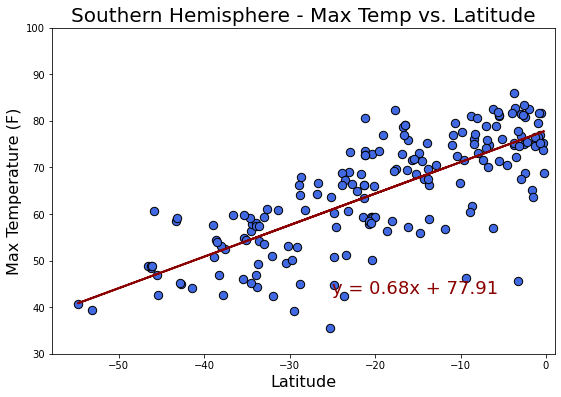

In [41]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Max Temp (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-25,43),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(30, 100)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-3, +1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig("City Latitude vs. MaxTemp_South.png")

# Show plot:
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

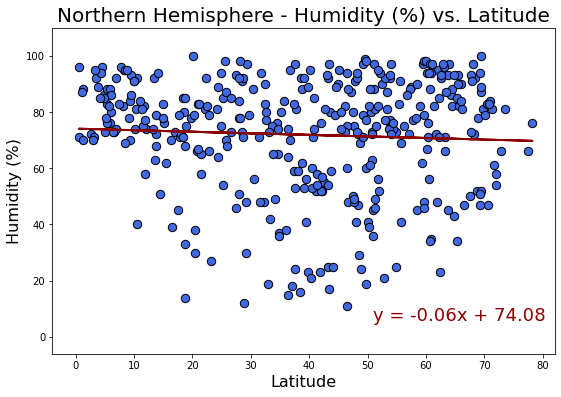

In [42]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Humidity (%)']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig("City Latitude vs. Humidity_North.png")

# Show plot:
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

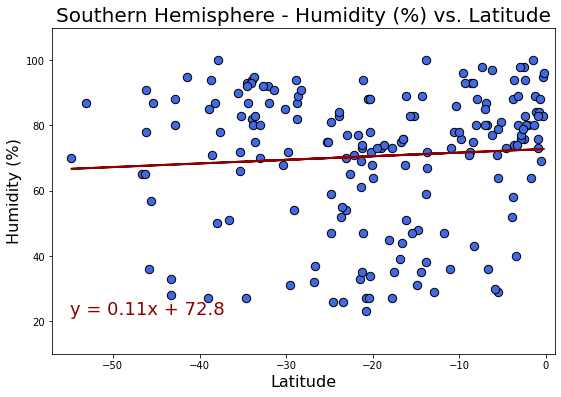

In [44]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Humidity (%)']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,22), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(10, 110)

# Set the limits of the x axis:
plt.xlim(-57, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig("City Latitude vs. Humidity_South.png")

# Show plot:
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

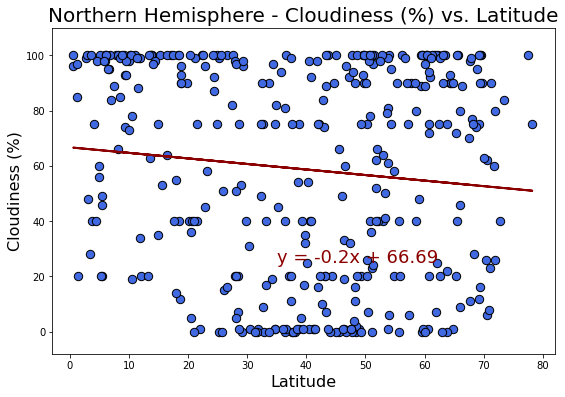

In [46]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Cloudiness (%)']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-8, 110)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig("City Latitude vs. Cloudiness_North.png")

# Show plot:
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

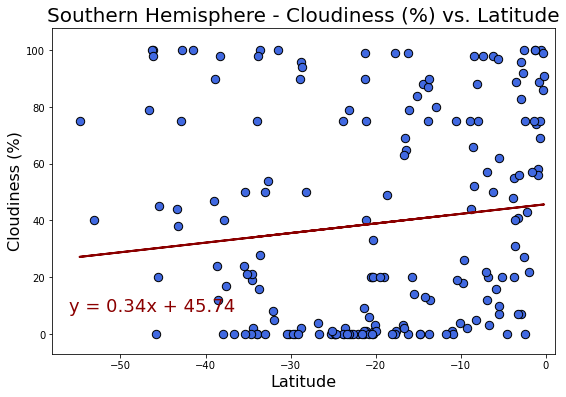

In [48]:
# build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Cloudiness (%)']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-7, 108)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig("City Latitude vs. Cloudiness_South.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01


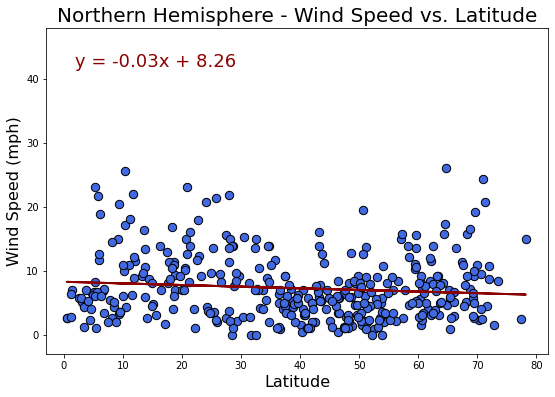

In [50]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Wind Speed (mph)']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='darkred')
plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-3, 48)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')
plt.savefig("City Latitude vs. Wind_North.png")

# Show plot:
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

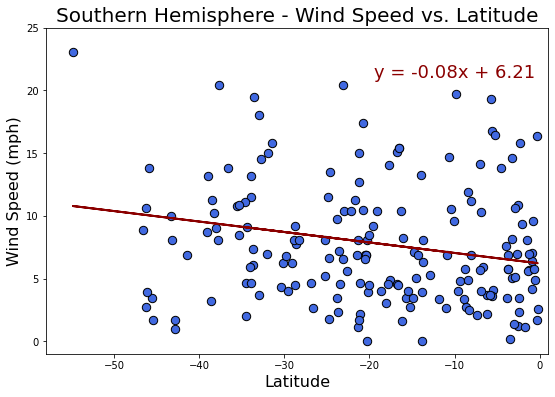

In [51]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Wind Speed (mph)']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-1, 25)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig("City Latitude vs. Wind_South.png")

# Show plot:
plt.show()